## numpy

除了基本的矩阵向量运算外，numpy还提供了快速傅里叶变换包，这一包将是本专栏编程中的主要工具。
如下是numpy.fft包的使用方法

In [1]:
from numpy.fft import fft,ifft,fftshift,fft2
import numpy as np

In [5]:
x = np.random.rand(8)
print(x)
fx = fft(x,n=10)
print(fx)

[0.55810535 0.46281298 0.72815644 0.18363381 0.29698279 0.49828211
 0.68271998 0.39819212]
[ 3.80888558+0.j         -0.31313077-0.53376487j  0.44235133-1.36113299j
  0.10116711+0.22858197j  0.29417452+0.39780973j  0.72304353+0.j
  0.29417452-0.39780973j  0.10116711-0.22858197j  0.44235133+1.36113299j
 -0.31313077+0.53376487j]


## scipy

scipy 是基于 numpy 的科学计算库，用于数学、科学、工程学等领域，模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解等。

scipy中的fftpack是用于快速傅里叶变换的包，功能和numpy.fft相同，大规模运算时更高效一些。

In [6]:
import scipy.fftpack as sf
fx = sf.fft(x,n=10)
print(fx)

[ 3.80888558-0.j         -0.31313077-0.53376487j  0.44235133-1.36113299j
  0.10116711+0.22858197j  0.29417452+0.39780973j  0.72304353-0.j
  0.29417452-0.39780973j  0.10116711-0.22858197j  0.44235133+1.36113299j
 -0.31313077+0.53376487j]


scipy.signal是一个专门做信号处理的包，可以用于卷积、滤波等。
下面代码是用于求得波形中的极值点。

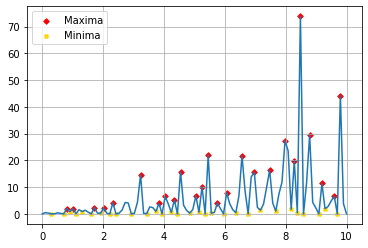

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#defining the x and y arrays
x = np.linspace(0,10, 100)
y = x*np.random.randn(100)**2

#Find peaks
peaks = find_peaks(y, height = 1, threshold = 1, distance = 1)
# print( peaks )
height = peaks[1]['peak_heights'] #list of the heights of the peaks
peak_pos = x[peaks[0]] #list of the peaks positions

#Finding the minima
y2 = y*-1
minima = find_peaks(y2)
min_pos = x[minima[0]] #list of the minima positions
min_height = y2[minima[0]] #list of the mirrored minima heights

#Plotting
fig = plt.figure()
ax = fig.subplots()
ax.plot(x,y)
ax.scatter(peak_pos, height, color = 'r', s = 15, marker = 'D', label = 'Maxima')
ax.scatter(min_pos, min_height*-1, color = 'gold', s = 15, marker = 'X', label = 'Minima')
ax.legend()
ax.grid()
plt.show()

## sympy

sympy是用于符号计算的包，可以用于精确的数学符号演算和推导。
如下例子是用于矩形函数的精确傅里叶变换，变换后是sinc函数。其中Piecewise是分段函数，Piecewise((0, x < -Rational(1,2)), (0, x>Rational(1,2)), (1, True))代表的是从-0.5到0.5的单位矩形。


In [8]:
from sympy import symbols,Ne,Rational,Piecewise,pi,sin,fourier_transform

x,k = symbols('x k')
rect = Piecewise((0, x < -Rational(1,2)), (0, x>Rational(1,2)), (1, True))
f = fourier_transform(rect,x,k)
print(f)


Piecewise((sin(pi*k)/(pi*k), (k > -oo) & (k < oo) & Ne(k, 0)), (1, True))


In [9]:
sinc = sin( pi * x) /(pi * x)
f = fourier_transform(sinc,x,k)
print(f)

Piecewise((0, 4*Abs(k**2) > 1), (1, True))


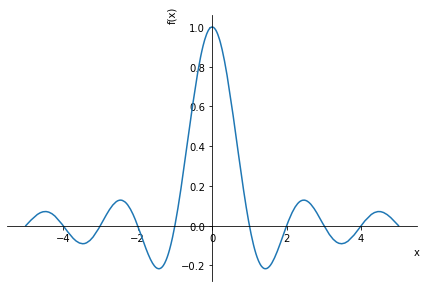

In [10]:
from sympy.plotting import plot
plot( sinc,(x,-5,5),show=True)